<center><h1>Wine quality Analysis</h1></center>

### Import Libraries

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import csv files and turn them into datasets for the project

<center><h2>Red Wine quality Analysis</h2></center>

In [172]:
red_wine_quality = pd.read_csv('../wine_quality/winequality-red.csv', sep=';')
display(red_wine_quality.head())
display(red_wine_quality.tail())
red_wine_quality.shape
red_wine_quality.describe()
red_wine_quality.info()
red_wine_quality.isnull().sum() #----> find missing values


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [173]:
# Delete blanks and high cases
red_wine_quality.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
red_wine_quality.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [174]:
# Get the mean of each numeric column in red_wine_quality
red_means = red_wine_quality.select_dtypes(include=[np.number]).mean()
print(red_means)

fixed_acidity            8.319637
volatile_acidity         0.527821
citric_acid              0.270976
residual_sugar           2.538806
chlorides                0.087467
free_sulfur_dioxide     15.874922
total_sulfur_dioxide    46.467792
density                  0.996747
ph                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64


<center><h2>White Wine quality Analysis</h2></center>

In [175]:
# same for white wine quality
white_wine_quality = pd.read_csv('../wine_quality/winequality-white.csv', sep=';')
display(white_wine_quality.head())
display(white_wine_quality.tail())
white_wine_quality.shape
white_wine_quality.describe()
white_wine_quality.info()
white_wine_quality.isnull().sum() #---->  find missing values

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [176]:
white_wine_quality = pd.read_csv('../wine_quality/winequality-white.csv', sep=';')
display(white_wine_quality.head())
display(white_wine_quality.tail())
white_wine_quality.shape
white_wine_quality.describe()
white_wine_quality.info()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [177]:
# Delete blanks and high cases
white_wine_quality.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
white_wine_quality.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [178]:
# Get the mean of each numeric column in white_wine_quality
white_means = white_wine_quality.select_dtypes(include=[np.number]).mean()
print(white_means)

fixed_acidity             6.854788
volatile_acidity          0.278241
citric_acid               0.334192
residual_sugar            6.391415
chlorides                 0.045772
free_sulfur_dioxide      35.308085
total_sulfur_dioxide    138.360657
density                   0.994027
ph                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64


<center><h3> Loop through each column and compare the means</center></h3>

In [179]:
# Loop through each column and compare the means
# for col in red_means.index:
#     if abs(red_means[col] - white_means[col]) >= 0.5 * white_means[col]:
#         if red_means[col] > white_means[col]:
#             print(f"{col} in red_wine_quality has a mean value more than 50% greater than {col} in white_wine_quality.")
#         else:
#             print(f"{col} in red_wine_quality has a mean value more than 50% less than {col} in white_wine_quality.")

<center><h3> Group wines into 3 categories: low, medium and high (quality)</center></h3>

In [180]:
# create new column called "quality_label" and define a range and associate that range with a label name (low, medium, high)
red_wine_quality['quality_label'] = red_wine_quality['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

In [181]:
# transform these labels into categrical data type (specific to pandas) instead of simple string
red_wine_quality['quality_label'] = pd.Categorical(red_wine_quality['quality_label'],
categories=['low', 'medium', 'high']) # matplotlib bar chart

In [182]:
red_wine_quality.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [183]:
# same procedure for white wine
white_wine_quality['quality_label'] = white_wine_quality['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

In [184]:
white_wine_quality['quality_label'] = pd.Categorical(white_wine_quality['quality_label'],
categories=['low', 'medium', 'high']) # matplotlib bar chart

In [185]:
white_wine_quality.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


<center><h3> Concatenate both types of wine data</center></h3>

In [186]:
# create a third dataset, in which we have both red and white wines together so we can compare it.
wine_quality = pd.concat([red_wine_quality, white_wine_quality])
wine_quality.shape
display(wine_quality.head())
display(wine_quality.tail())
wine_quality.info()
wine_quality.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_label
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,medium


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         6497 non-null   float64 
 1   volatile_acidity      6497 non-null   float64 
 2   citric_acid           6497 non-null   float64 
 3   residual_sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free_sulfur_dioxide   6497 non-null   float64 
 6   total_sulfur_dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   ph                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  quality_label         6497 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 666.3 KB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [187]:
display(red_wine_quality.describe())

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [188]:
wine_quality.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000



<center><h3> Exploratory Data Analysis of the merged table</center></h3>

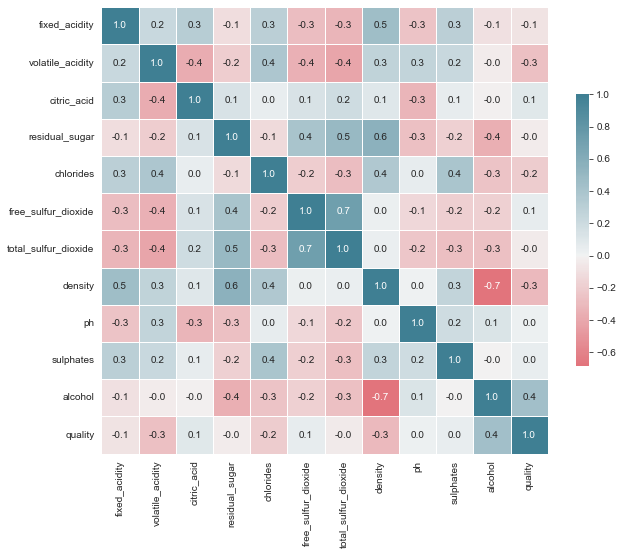

In [189]:
# Create a table like the one below to compare Descriptive Statistics between red and white wines.
pd.concat([red_wine_quality.describe(), white_wine_quality.describe()], axis=1, keys=["Red Wines Stats", "White Wines Stats"])
plt.figure(figsize=(10, 10))
corr = wine_quality.corr()
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, annot=True, fmt='.1f', cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [190]:
# find highly correlated features  about the comparison between red and white wine
corr_matrix = wine_quality.corr()
highly_correlated_features = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= 0.5:
            feature_pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            highly_correlated_features.append(feature_pair)

print("Highly correlated features:")
for feature_pair in highly_correlated_features:
    print(feature_pair[0], "and", feature_pair[1], "with correlation coefficient of", feature_pair[2])

Highly correlated features:
residual_sugar and density with correlation coefficient of 0.5525169502932384
free_sulfur_dioxide and total_sulfur_dioxide with correlation coefficient of 0.720934081378524
density and alcohol with correlation coefficient of -0.6867454216820781


<center><h3> Create first plots using seaborn</center></h3>

<h4> Pie Chart - Quantity of Red Wines vs. Quantity of White Wines</h4>

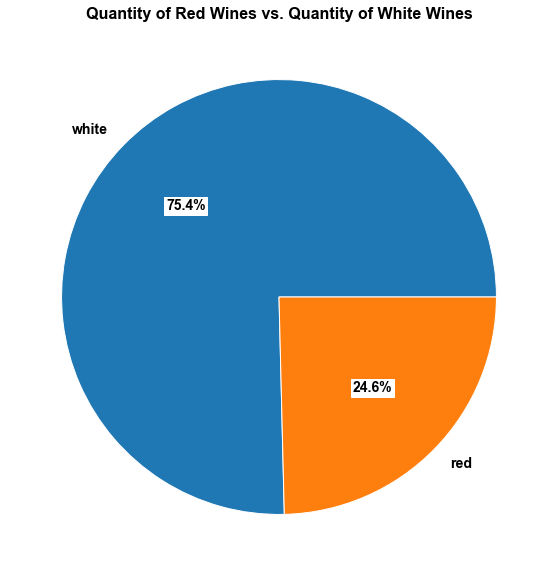

In [191]:
# create a pie chart showing the quantity of red wines compared to the quantity of white wines
red_wine_quality['type'] = 'red' # create a new column called "type" and assign a value of "red" to each row
white_wine_quality['type'] = 'white' # create a new column called "type" and assign a value of "white" to each row
wine_quality = pd.concat([red_wine_quality, white_wine_quality]) # create a new dataset called "wine_quality" that contains both red and white wines
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(wine_quality['type'].value_counts(), labels=wine_quality['type'].value_counts().index, autopct='%1.1f%%', textprops={'color': 'black', 'fontsize': 14, 'fontweight': 'bold', 'bbox': {'facecolor': 'white', 'edgecolor': 'white', 'pad': 2}})
ax.set_facecolor('xkcd:black')
plt.title('Quantity of Red Wines vs. Quantity of White Wines', color='black', fontsize=16, backgroundcolor='white', fontweight='bold')
plt.show()

<h4> Bar Plot - distribution of qualities</h4>

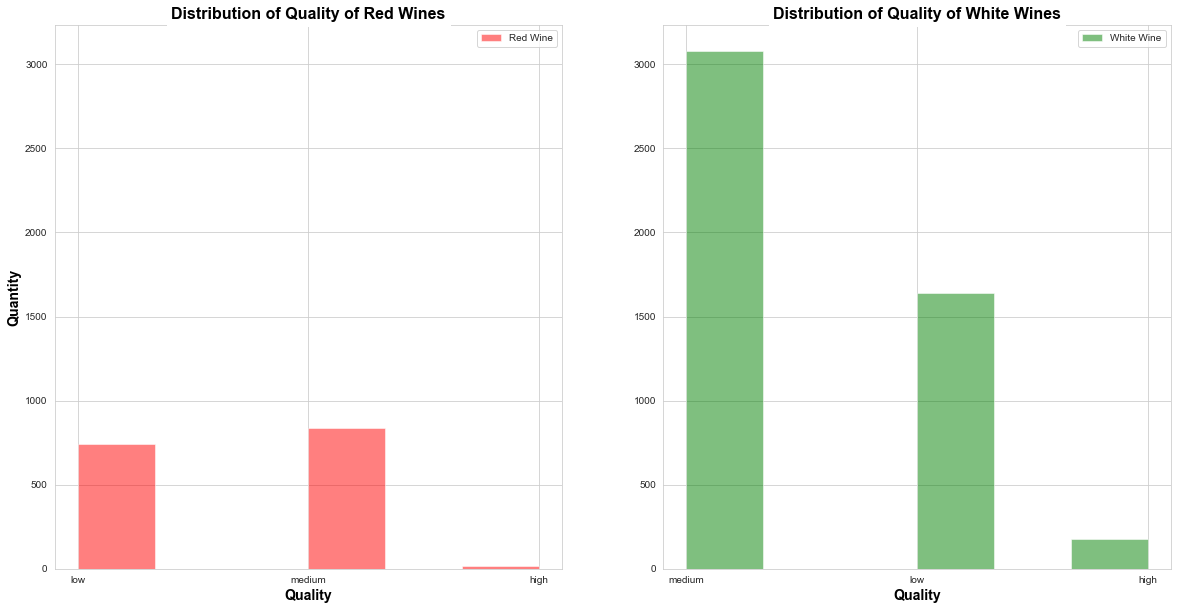

In [193]:
# create a plot to show the distribution of qualities of both wines
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
ax1.hist(red_wine_quality['quality_label'], bins=6, alpha=0.5, label='Red Wine', color='red',align='mid', rwidth=2)
ax2.hist(white_wine_quality['quality_label'], bins=6, alpha=0.5, label='White Wine', color='green',align='mid', rwidth=2)
ax1.set_facecolor('xkcd:white')
ax2.set_facecolor('xkcd:white')
ax1.set_xlabel('Quality', color='black', fontsize=14, fontweight='bold')
ax2.set_xlabel('Quality', color='black', fontsize=14, fontweight='bold')
ax1.set_ylabel('Quantity', color='black', fontsize=14, fontweight='bold')
ax1.set_title('Distribution of Quality of Red Wines', color='black', fontsize=16, backgroundcolor='white', fontweight='bold')
ax2.set_title('Distribution of Quality of White Wines', color='black', fontsize=16, backgroundcolor='white', fontweight='bold')
ax1.legend()
ax2.legend()
# set the same y-axis limit for both subplots
ax1.set_ylim(ax2.get_ylim())

plt.show()

<h4>Seaborn histplot</h4>

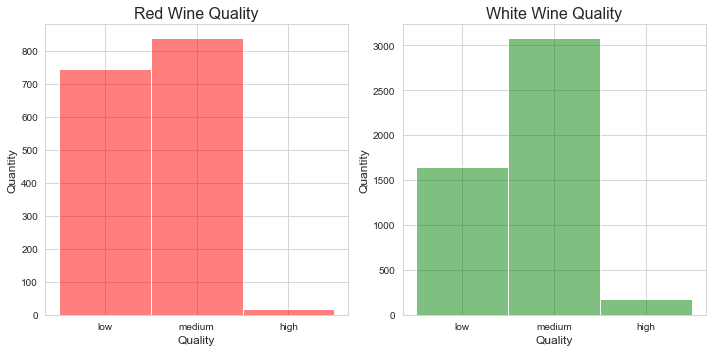

In [207]:
# create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# create a histogram plot for red wine quality in the first subplot
sns.histplot(data=red_wine_quality, x='quality_label', bins=6, alpha=0.5, color='red', ax=axs[0])
axs[0].set_title("Red Wine Quality", fontsize=16)
axs[0].set_xlabel("Quality", fontsize=12)
axs[0].set_ylabel("Quantity", fontsize=12)

# create a histogram plot for white wine quality in the second subplot
sns.histplot(data=white_wine_quality, x='quality_label', bins=6, alpha=0.5, color='green', ax=axs[1])
axs[1].set_title("White Wine Quality", fontsize=16)
axs[1].set_xlabel("Quality", fontsize=12)
axs[1].set_ylabel("Quantity", fontsize=12)

# adjust the layout of the subplots
plt.tight_layout()

# show the plot
plt.show()

<h4>Seaborn box plot - Wine Quality - Alcohol Content/pH</h4>

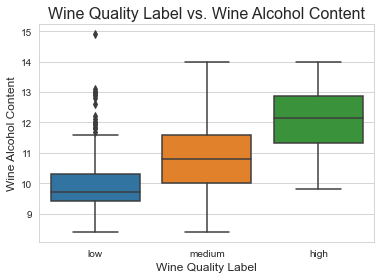

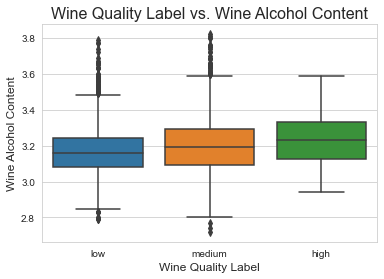

In [221]:
# Load winequality dataset from seaborn

# create a boxplot with seaborn that analyses the wine quality label with wine alcohol content, and also wine ph
sns.boxplot(x='quality_label', y='alcohol', data=red_wine_quality)
plt.title('Wine Quality Label vs. Wine Alcohol Content', fontsize=16)
plt.xlabel('Wine Quality Label', fontsize=12)
plt.ylabel('Wine Alcohol Content', fontsize=12)
plt.show()

sns.boxplot(x='quality_label', y='ph', data=white_wine_quality)
plt.title('Wine Quality Label vs. Wine Alcohol Content', fontsize=16)
plt.xlabel('Wine Quality Label', fontsize=12)
plt.ylabel('Wine pH', fontsize=12)
plt.show()